In [108]:
import seaborn as sns
data=sns.load_dataset('iris')

In [109]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [110]:
x=data.drop("species",axis=1)

In [111]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [112]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['species']=encoder.fit_transform(data['species'])

In [113]:
y=data[['species']]

In [114]:
y.head()

,species
0,0
1,0
2,0
3,0
4,0


<Axes: >

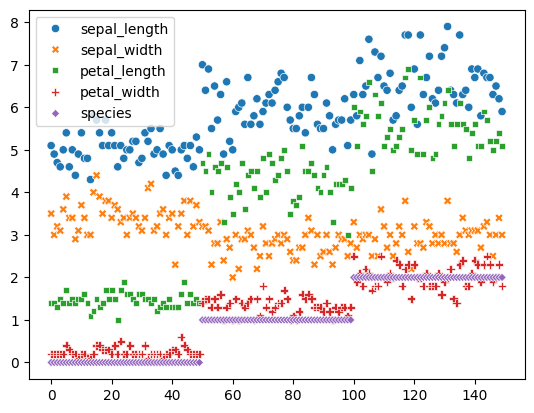

In [115]:
sns.scatterplot(data)

In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [117]:
x_train.shape

(120, 4)

In [118]:
x_test.shape

(30, 4)

In [119]:
y_train.shape

(120, 1)

In [120]:
y_test.shape

(30, 1)

In [121]:
from sklearn.cluster import KMeans
print("Importing KMeans....")

Importing KMeans....


In [122]:
k_rng=range(1,20)
sse=[]
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(x_train,y_train)
  x=km.inertia_
  sse.append(x)

In [123]:
sse

[558.9241666666666,
 129.20566841617787,
 63.19666666666666,
 45.74390109890112,
 36.05660237154151,
 34.87608178102093,
 30.034915084915088,
 28.59105843552583,
 24.517378151260495,
 26.36707792207793,
 19.319982883129942,
 17.813123737373736,
 16.58050595238095,
 16.26715919701214,
 14.780196733821734,
 14.407817460317466,
 13.58264884135473,
 12.19885912698413,
 11.526597222222222]

Text(0, 0.5, 'value')

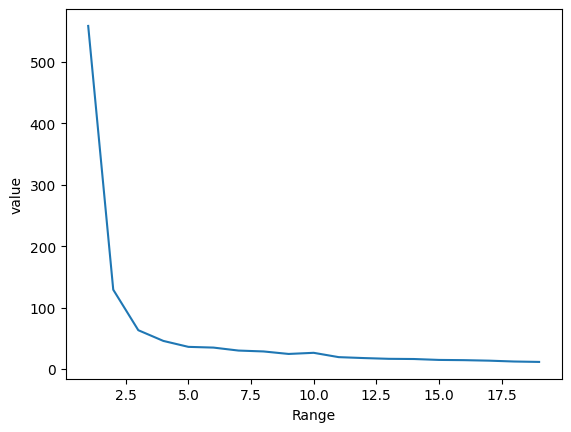

In [124]:
import matplotlib.pyplot as plt
plt.plot(k_rng,sse)
plt.xlabel("Range")
plt.ylabel("value")

In [140]:
model=KMeans(n_clusters=2)
model.fit(x_train,y_train)

KMeans(n_clusters=2)

In [141]:
y_pred=model.predict(x_test)

In [142]:
y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0], dtype=int32)

In [143]:
import numpy as np
y_test=np.array(y_test)
y_test

array([[2],
       [1],
       [0],
       [2],
       [0],
       [2],
       [0],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [2],
       [1],
       [0],
       [0],
       [2],
       [0],
       [0],
       [1],
       [1],
       [0]])

In [144]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7666666666666667